## Rotations

To prepare for rotations in space we consider the planar rotations of the previous notebook from a more analytical viewpoint.  In particular, with reference to Figure \ref{fig:rot2}, we observe that

\begin{equation} \label{eq:xycirc}
  x_0(\theta) = r\cos(\theta), \\
  x_1(\theta) = r\sin(\theta)
\end{equation}

traces out a circle of radius $r$ in the $(x_0,x_1)$ plane as $\theta$ travels from 0 to $2\pi$. On differentiating this pair with respect to $\theta$ we arrive at the tangent vector with components

\begin{equation} \label{eq:circtan}
  x'_0(\theta) = -r\sin(\theta), \\
  x'_1(\theta) = r\cos(\theta)
\end{equation}

This vector is most naturally illustrated when translated to the point at which it is tangent.

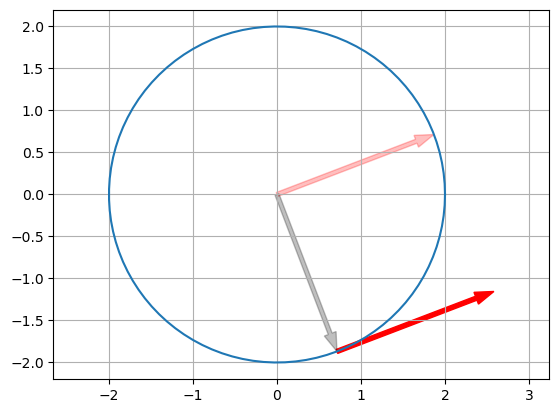

In [1]:
# planar rotation with tangent
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi,100)
r = 2

x0 = r*np.cos(theta)
x1 = r*np.sin(theta)
plt.plot(x0, x1)

dx0 = -r*np.sin(theta)
dx1 = r*np.cos(theta)

m = np.random.randint(100)  

plt.arrow(x0[m], x1[m], dx0[m], dx1[m], width=0.05, color='r', length_includes_head=True)
plt.arrow(0, 0, dx0[m], dx1[m], width=0.05, color='r', alpha=0.25, length_includes_head=True)
plt.arrow(0, 0, x0[m], x1[m], width=0.05, color='k', alpha=0.25, length_includes_head=True)
plt.grid('on')
plt.axis('equal')
plt.show()

\begin{myfig}\label{fig:rot2} At a random point, $x$ in gray, on the blue circle we graph the tangent vector, $x'$, in light red, and it's parallel translate in dark red. Rerun to see new tangent.\end{myfig}

\begin{exercise}\label{ex:gtan}
Regarding (\ref{eq:xycirc}) and (\ref{eq:circtan}), please confirm that $\|x(\theta)\|=r$, and $\|x'(\theta)\|=r$ and $x^T(\theta)x'(\theta)=0$ for each $0\le\theta <2\pi$.
\end{exercise}

This exercise and Figure \ref{fig:rot2} indicate that $x'$ is simply rotation of $x$ by $\pi/2$, i.e.,

\begin{equation}\label{eq:rot2b}
  x'(\theta) = Sx(\theta), \where S = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}
\end{equation}

We solve this differential equation by analogy with the scalar case. In particular, as the solution to $y'(t)=5y(t)$ is $y(t)=\exp(5t)y(0)$, we expect the solution of (\ref{eq:rot2b}) to be

\begin{equation}\label{eq:rot2c}
  x(\theta) = \exp(\theta S)x(0)
\end{equation}

where

\begin{equation}\label{eq:TayExp}
   \exp(\theta S) = I + \theta S + (\theta S)^2/2! + (\theta S)^3/3! + (\theta S)^4/4! + (\theta S)^5/5! + \cdots
\end{equation}

where $I$ is the 2-by-2 identity matrix. This looks complicated, until you realize that $S^2=-I$.

\begin{exercise}\label{ex:S2pow}
Please show that
\begin{equation*}
  S^{2m-1} = (-1)^{m+1}S  \and S^{2m} = (-1)^mI \hskip 0.25in m=1,2,\ldots
\end{equation*}
and deduce that
\begin{equation*}
  \eqalign{
   \exp(\theta S) &= I + \theta S - \theta^2 I/2! - \theta^3 S/3! + \theta^4 I/4! + \theta^5 S/5! + \cdots \cr
      &= (1 - \theta^2/2! + \theta^4/4! - \cdots)I + (\theta - \theta^3/3! + \theta^5/5! - \cdots)S \cr
      &= \cos(\theta)I + \sin(\theta)S \cr
      &= K(\theta) \hskip{0.25in}\hbox{from our previous notebook.}\cr}
\end{equation*}
\end{exercise}

To **recap**, our return to planar rotations has revealed that 

\begin{equation}\label{eq:expS2}
  \boxed{K(\theta)=\exp(\theta S)}
\end{equation}

where $S$ is the matrix that transforms points to tangents along the circle of rotation. This will be our clue to exploring rotations in space. Given a unit vector $a\in\maR^3$ and vector $x\in\maR^3$ we illustrate in Figure \ref{fig:3drot} the counterclockwise rotation of $x$ about $a$ by angle $\theta$, together with its translated tangent vector.

<IPython.core.display.Javascript object>


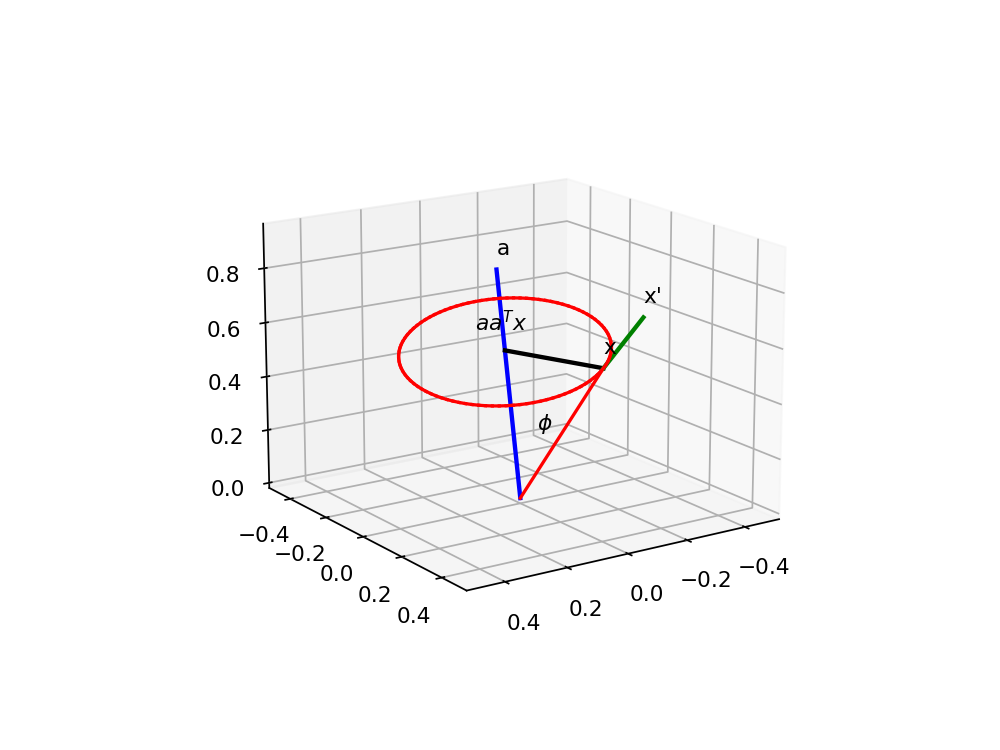

In [2]:
# an illustration of rotation about an axis
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work
ax.view_init(elev = 14, azim = 18)

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector
A = np.outer(a,a)
I = np.eye(3)
X = np.array([[0, -a[2], a[1]],[a[2], 0, -a[0]], [-a[1], a[0], 0]])   # the cross product matrix

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2]+0.05, 'a')                             # label the a vector

x = np.array([0,2,3])/5
ax.plot3D([0, x[0]], [0, x[1]], [0, x[2]],'r')   # plot the x vector
ax.text3D(x[0], x[1], x[2]+.05, 'x')                             # label the x vector

Ax = A@x
ax.plot3D([Ax[0], x[0]], [Ax[1], x[1]], [Ax[2], x[2]], 'k',linewidth=2)   # plot the A*x vector
ax.text3D(Ax[0], Ax[1]-.15, Ax[2]+0.025, '$aa^Tx$')   # label the A*x vector

dx = np.cross(a, x)
ax.plot3D([x[0], x[0]+dx[0]], [x[1], x[1]+dx[1]], [x[2], x[2]+dx[2]], 'g',linewidth=2)   # plot the dx vector
#ax.arrow3D(x[0], x[1], x[2], dx[0], dx[1], dx[2], width=0.05, color='g', length_includes_head=True)   # plot the dx vector
ax.text3D(x[0]+dx[0], x[1]+dx[1], x[2]+dx[2]+0.05, "x'")   # label the dx vector

p = (Ax + x)/4
ax.text3D(p[0], p[1], p[2], '$\phi$')   # label phi

Theta = np.linspace(0,2*np.pi,100)

y = x  # temp storage

for theta in Theta:
    K = A + np.sin(theta)*X + np.cos(theta)*(I-A)    # the rotation matrix
    newy = K@x
    ax.plot3D([y[0], newy[0]], [y[1], newy[1]], [y[2], newy[2]],'r')   # connect old to new
    y = newy

ax.grid('on')
ax.set_xlim(-.5, .5)
ax.set_ylim(-.5, .5);

\begin{myfig}\label{fig:3drot} An axis defined by a blue unit vector, $a$. We choose a red vector $x$ that makes the angle $\phi$ with $a$. We rotate $x$ about $a$ and trace out the red circle centered at $aa^Tx$ (the projection of $x$ onto $a$).
At $x$ we also plot the black normal (radial) vector to the circle and the green tangent vector, $x'$. \end{myfig}

We learn from this figure that the tangent vector, $x'$, is perpendicular to the plane spanned by $a$ and $x$, obeys the right-hand-rule, and that its length is $\|x\|\sin(\phi)$. As such, the tangent vector at $x$ is the cross product of $a$ and $x$. That is,

\begin{equation} \label{eq:oderot}
  x'(\theta) = a\times x = X(a)x
\end{equation}

and **so $X(a)$ is the matrix that transforms points to tangents during a rotation.** Based on (\ref{eq:expS2}) we therefore expect the associated rotation matrix to be

\begin{equation*}
  K(a,\theta) \equiv \exp(\theta X(a)) = I + \theta X(a) + (\theta X(a))^2/2 + (\theta X(a))^3/3! + (\theta X(a))^4/4! + \cdots
\end{equation*}

Now, thanks to Exercise \ref{ex:CP0} we know that powers of $X(a)$ divide neatly between even and odd that in turn reveal $\sin(\theta)$ and $\cos(\theta)$.

\begin{exercise}\label{ex:expXa}
Please show that
\begin{equation*}
  X(a)^{2m-1} = (-1)^{m+1}X(a) \and X(a)^{2m} = (-1)^m(I - aa^T) \hskip 0.25in m=1,2,\ldots
\end{equation*}
and so
\begin{equation*}
  K(a,\theta) = \exp(\theta X(a)) 
  = I + \sin(\theta)X(a) + (\cos(\theta)-1)(I-aa^T) 
  = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)
\end{equation*}
\end{exercise}

This deserves a box. The counterclockwise rotation by $\theta$ about the unit-length axis $a\in\maR^3$ is

\begin{equation}\label{eq:Kat}
  \boxed{K(a,\theta) = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)}
\end{equation}


Let us produce these matrices when $a$ is one of the coordinate axes

\begin{equation}\label{eq:eCart}
 e_x = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_y = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_z = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{equation}

\begin{exercise}\label{ex:Rot3euc}
Please confirm that

\begin{equation}\label{eq:Kax}
 K(e_x,\theta) = \begin{bmatrix} 
       1 & 0 & 0 \\ 0 & \cos(\theta) & -\sin(\theta) \\  0 & \sin(\theta) & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_y,\theta) = \begin{bmatrix} 
         \cos(\theta) & 0 & \sin(\theta) \\  0 & 1 & 0 \\ -\sin(\theta) & 0 & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_z,\theta) = \begin{bmatrix} 
       \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}

and in each case show that its determinant, via Equation \ref{eq:det3}, is 1 and its trace is $1+2\cos\theta$.

\end{exercise}

Your solution here.

These coordinate rotations, (\ref{eq:Kax}), indeed have the look of the planar rotations of our previous notebook. Let's now show that $K(a,\theta)$ indeed leaves $a$ unmolested, that its transpose reverses the rotation, that composite rotations correspond to sums of angles,
and that it preserves length (norm) and angle (with respect to $a$).


\begin{exercise}\label{ex:Rot3a}
Use Exercise (\ref{ex:CP0}) to conclude that 

(i) $K(a,\theta)a = a$

(ii) $K(a,\theta)^T = K(a,-\theta)$

(iii) $K(a,\theta)K(a,\phi)=K(a,\theta+\phi)$

(iv) $\|K(a,\theta)x\| = \|x\|$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(v) $\angle(a,x)=\angle(a,K(a,\theta)x)$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(vi) $K'(a,\theta)=X(a)K(a,\theta)$ where prime, as above, denotes $d/d\theta$.
\end{exercise}

Your solution here.

We could "see" the trace of each coordinate rotation, (\ref{eq:Kax}), without trouble, and found it to be independent of direction. Using $\|a\|=1$ and that the trace of a sum is the sum of the traces please use (\ref{eq:Kat}) to

\begin{exercise}\label{ex:trKa} Show that $\tr(K(a,\theta))=1+2\cos(\theta)$
\end{exercise}

Your solution here.

Our next application of rotations will be to map one right-handed **orthonormal** frame, $(f_x,f_y,f_z)$, to another, $(f_1,f_2,f_3)$. By orthonormal we mean the the three vectors are each unit vectors, and each is perpendicular to the other two. We illustrate these two frames in Figure \ref{fig:EulerAngles}.

<IPython.core.display.Javascript object>


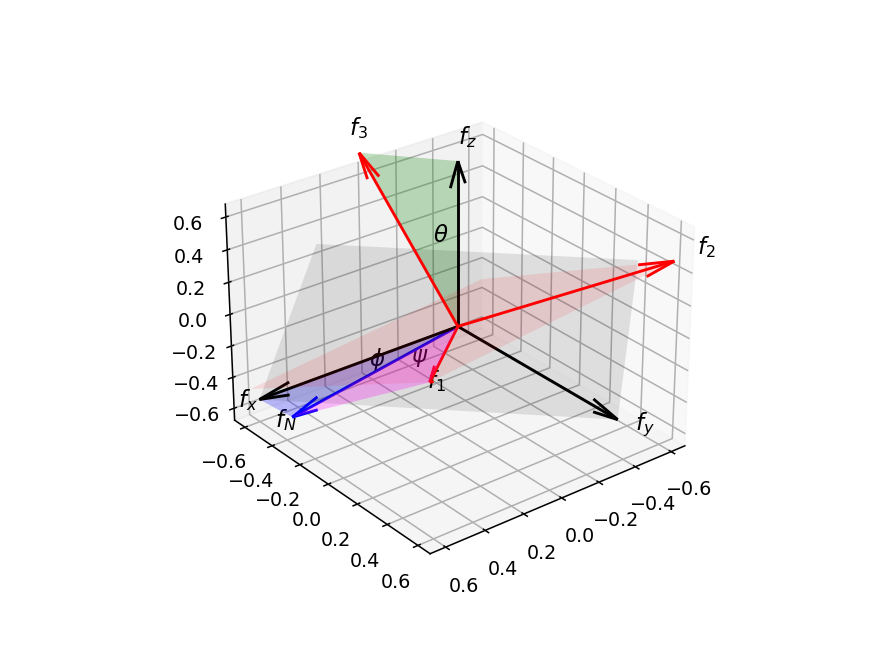

In [1]:

# transformation of frames
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib notebook

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

fx = np.array([1,0,0])
fy = np.array([0,1,0])
fz = np.array([0,0,1])

F1 = ax.quiver([0,0,0],[0,0,0],[0,0,0],fx,fy,fz, colors='k', arrow_length_ratio=.15)

# create the e plane 
x = [fx[0], fy[0], -fx[0], -fy[0]]   
y = [fx[1], fy[1], -fx[1], -fy[1]]   
z = [fx[2], fy[2], -fx[2], -fy[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'k', alpha = 0.1))

tfx = 1.1*fx
ax.text3D(tfx[0], tfx[1], tfx[2], '$f_x$', fontsize=12)
tfy = 1.1*fy
ax.text3D(tfy[0], tfy[1], tfy[2], '$f_y$', fontsize=12)
tfz = 1.1*fz
ax.text3D(tfz[0], tfz[1], tfz[2], '$f_z$', fontsize=12)

f1 = np.array([1,1,0.5])/np.sqrt(2.25)
f2 = np.array([-1,1,0.75])/np.sqrt(2+9/16)
f3 = np.cross(f1, f2)
f3 = f3 / np.linalg.norm(f3)

F2 = ax.quiver([0,0,0],[0,0,0],[0,0,0],
               [f1[0], f2[0], f3[0]],[f1[1], f2[1], f3[1]], [f1[2], f2[2], f3[2]], colors='r', arrow_length_ratio=.15)

# create the f plane 
x = [f1[0], f2[0], -f1[0], -f2[0]]   
y = [f1[1], f2[1], -f1[1], -f2[1]]   
z = [f1[2], f2[2], -f1[2], -f2[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor='r', alpha = 0.1))

tf1 = 1.1*f1
ax.text3D(tf1[0], tf1[1], tf1[2], '$f_1$', fontsize=12)
tf2 = 1.1*f2
ax.text3D(tf2[0], tf2[1], tf2[2], '$f_2$', fontsize=12)
tf3 = 1.1*f3
ax.text3D(tf3[0], tf3[1], tf3[2], '$f_3$', fontsize=12)

fN = np.cross(fz, f3)
fN = fN / np.linalg.norm(fN)
F3 = ax.quiver(0,0,0,fN[0], fN[1], fN[2], colors='b', arrow_length_ratio=.15)
tfN = 1.1*fN
ax.text3D(tfN[0], tfN[1], tfN[2], '$f_N$', fontsize=12)

# create the theta span
x = [0, f3[0], fz[0]]  
y = [0, f3[1], fz[1]]  
z = [0, f3[2], fz[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.25))
f3z = (f3 + fz)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\\theta$', fontsize=12)

# create the phi span
x = [0, fx[0], fN[0]]  
y = [0, fx[1], fN[1]]  
z = [0, fx[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.25))
f3z = (fx + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\phi$', fontsize=12)

# create the psi span
x = [0, f1[0], fN[0]]  
y = [0, f1[1], fN[1]]  
z = [0, f1[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = [1,0,1], alpha = 0.25))
f3z = (f1 + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\psi$', fontsize=12)

ax.set_xlim3d([-1.25, 1.25])
ax.set_ylim3d([-1.25, 1.25])
ax.set_zlim3d([-1.25, 1.25])
plt.show()

\begin{myfig}\label{fig:EulerAngles} Transformation of the given frame $(f_x, f_y, f_z)$ into the target frame $(f_1,f_2,f_3)$.
Please rotate and zoom to explore the three angles between the two frames. The black $(f_x,f_y)$ plane intersects the red $(f_1,f_2)$ plane along the blue
$f_N = f_z\times f_3/\Vert f_z\times f_3\Vert$ direction. We denote by $\phi$ the angle from $f_x$ to $f_N$ looking down $f_z$. We paint this span blue and note, as $f_x$ and $f_N$ lie in the black plane,  that

\begin{equation}\label{eq:EA1}
  f_N = K(f_z,\phi)f_x
\end{equation}

We next denote by $\theta$ the angle from $f_z$ to $f_3$ looking down $f_N$. We paint this span green and note that

\begin{equation}\label{eq:EA2}
  f_3 = K(f_N,\theta)f_z
\end{equation}

We finally denote by $\psi$ the angle from $f_N$ to $f_1$ looking down $f_3$. We paint this span purple and note, as $f_N$ and $f_1$ lie in the red plane, that

\begin{equation}\label{eq:EA3}
  f_1 = K(f_3,\psi)f_N
\end{equation}

\end{myfig}

We collect these individual rotations into the composite

\begin{equation}\label{eq:EATot}
  \cK \equiv K(f_3,\psi)K(f_N,\theta)K(f_z,\phi)
\end{equation}

and establish that $\cK$ indeed transforms $(f_x,f_y,f_z)$ to $(f_1,f_2,f_3)$.

\begin{exercise}\label{ex:EA0} (a) Please confirm that $\cK f_x=f_1$ and $\cK f_z = f_3$. 

(b) Please use $(AB)^T=B^TA^T$ and Exercise \ref{ex:Rot3a} to deduce that $\cK^T\cK = I$.

(c) Use (b) to show that  $\cK f_y$ is a unit vector perpendicular to **both** $f_1$ and $f_3$ and so can only be $f_2$ or $-f_2$. Use Proposition \ref{prop:frameOri} to rule out the latter option.

\end{exercise}

Your solution here.

Given an arbitrary rotation matrix, $R$, we note that it transforms the coordinate axes, $\{e_x,e_y,e_z\}$ to some new frame, $\{f_1,f_2,f_3\}$. In this case we read (\ref{eq:EATot}) to dictate that we
first rotate by $\phi$ about the z-axis, next by $\theta$ about the new x-axis, and finally by $\psi$ about the subsequent z-axis. As such this means that $R$ is of the form

\begin{equation}\label{eq:EulerAnglesGenRot}
 R = K(e_z,\psi)K(e_x,\theta)K(e_z,\phi) =
  \begin{bmatrix} \cos(\psi) & -\sin(\psi) & 0 \\ \sin(\psi) & \cos(\psi) & 0 \\ 0 & 0 & 1 \end{bmatrix} 
  \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos(\theta) & -\sin(\theta) \\  0 & \sin(\theta) & \cos(\theta)\end{bmatrix}
  \begin{bmatrix} \cos(\phi) & -\sin(\phi) & 0 \\ \sin(\phi) & \cos(\phi) & 0 \\ 0 & 0 & 1 \end{bmatrix} 
\end{equation}

Recall that we showed that each of these constituents is volume preserving (has determinant one) and hence we may expect that their composition is also volume preserving. We will prove in a subsequent notebook that $\det(AB)=\det(A)\det(B)$ for arbitrary square matrices. This was easy in the 2-by-2 case but already becomes too tedious in 3 dimensions. For those that would like direct confirmation that all rotations have determinant one you may instead compute the product in (\ref{eq:EulerAnglesGenRot}) and evaluate its determinant via (\ref{eq:det3}). You may also of course apply the same procedure to the original representation, (\ref{eq:Kat}).


For our work in robotics we will need to automate the generation of the frame transformer in (\ref{eq:EATot}). The only nonstandard part of the calculation lies in the computing the angles between two vectors while looking down a third vector. To quantify this we use Proposition \ref{prop:frameOri} to determine whether or not the three vectors of concern obey the right-hand-rule. In particular, we multiply the putative angle (obtained via (\ref{eq:CSE})) by the sign of the determinant of the three directions.

The code below implements this logic on random reference and target frames and prints the errors committed in reaching the target.

In [70]:
# frame-2-frame transformation. To keep the code clean and reusable we limit it to straight numerics
# You may wish to add visualization code that sweeps out the 3 individual rotations

import numpy as np

# make a random reference frame
fx = np.random.randn(3)
fx = fx / np.linalg.norm(fx)
fy = np.random.randn(3)
fy = fy - np.dot(fx,fy)*fx
fy = fy / np.linalg.norm(fy)
fz = np.cross(fx,fy)
fz = fz / np.linalg.norm(fz)

# make a random target frame
f1 = np.random.randn(3)
f1 = f1 / np.linalg.norm(f1)
f2 = np.random.randn(3)
f2 = f2 - np.dot(f1,f2)*f1  
f2 = f2 / np.linalg.norm(f2)
f3 = np.cross(f1,f2)       
f3 = f3 / np.linalg.norm(f3)

# build the frame transformer

fN = np.cross(fz,f3)
fN = fN / np.linalg.norm(fN)

ori1 = np.linalg.det(np.vstack((fx, fN, fz)))   # check orientation of this triple
phi = np.sign(ori1)*np.arccos(np.dot(fx, fN))  
fzO = np.outer(fz, fz)
Xfz = np.array([[0, -fz[2], fz[1]], [fz[2], 0, -fz[0]], [-fz[1], fz[0], 0]])
K1 = fzO + np.sin(phi)*Xfz + np.cos(phi)*(np.eye(3)-fzO)

ori2 = np.linalg.det(np.vstack((fz, f3, fN)))
theta = np.sign(ori2)*np.arccos(np.dot(fz, f3))
fNO = np.outer(fN, fN)
XfN = np.array([[0, -fN[2], fN[1]], [fN[2], 0, -fN[0]], [-fN[1], fN[0], 0]])
K2 = fNO + np.sin(theta)*XfN + np.cos(theta)*(np.eye(3)-fNO)

ori3 = np.linalg.det(np.vstack((fN, f1, f3)))
psi = np.sign(ori3)*np.arccos(np.dot(fN, f1))
f3O = np.outer(f3, f3)
Xf3 = np.array([[0, -f3[2], f3[1]], [f3[2], 0, -f3[0]], [-f3[1], f3[0], 0]])
K3 = f3O + np.sin(psi)*Xf3 + np.cos(psi)*(np.eye(3)-f3O)

K = K3@K2@K1
nf1 = K@fx     # the transformation of fx
nf2 = K@fy
nf3 = K@fz

print('error in f1 = ', np.linalg.norm(f1-nf1))    # determine whether nf1 is indeed f1
print('error in f2 = ', np.linalg.norm(f2-nf2))
print('error in f3 = ', np.linalg.norm(f3-nf3))

error in f1 =  5.489222091146175e-15
error in f2 =  5.4922430125786724e-15
error in f3 =  3.7238012298709097e-16


\begin{exercise}\label{ex:oframe}
Explain in words how this code constructs frames and why they are each orthonormal.
\end{exercise}